# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.044981e+01     6.791317e+00
 * time: 0.004602909088134766
     1     2.906828e+01     4.953136e+00
 * time: 0.017838001251220703
     2     2.368669e+01     7.475993e+00
 * time: 0.03910994529724121
     3     1.337023e+01     2.190399e+00
 * time: 0.06438803672790527
     4     1.330749e+01     4.172024e+00
 * time: 0.08148598670959473
     5     1.199692e+01     2.509079e+00
 * time: 0.1026768684387207
     6     1.137442e+01     2.627623e+00
 * time: 0.1195979118347168
     7     1.066410e+01     1.730190e+00
 * time: 0.1365809440612793
     8     1.013591e+01     1.148889e+00
 * time: 0.1535038948059082
     9     9.856104e+00     8.818508e-01
 * time: 0.17050504684448242
    10     9.639263e+00     4.526791e-01
 * time: 0.18741798400878906
    11     9.548056e+00     4.142810e-01
 * time: 0.20429706573486328
    12     9.534253e+00     6.021628e-01
 * time: 0.21705198287963867
    13     9.517923e+00     3.917471e-01
 * time: 0

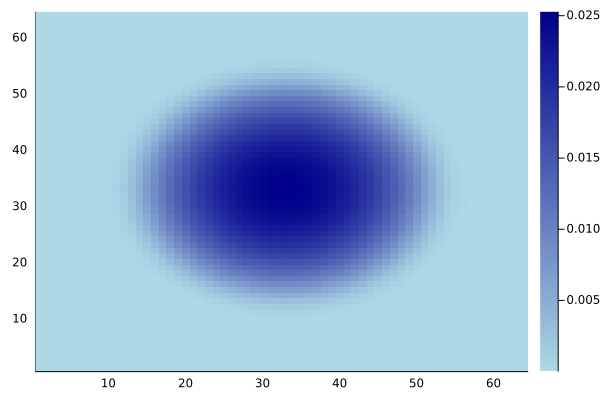

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)